<a href="https://colab.research.google.com/github/BMugo84/pytorch_in_25_hours/blob/main/pytorch01Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch workflow



![picture](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/images/01_a_pytorch_workflow.png?raw=true)

## Exploring a typical PyTorch end-end workflow

In [ ]:
what_were_covering = {1: "data preperation and loading",
                      2: "building a model or picking a pretrained one",
                      3: "fiting the model to data",
                      4: "making predictions and evaluating a model",
                      5: "saving and loading a model",
                      6: "putting it all together"
                      }

In [ ]:
# imports
import torch
from torch import nn    #nn contains all of pytorch's building blocks for a neural network
import matplotlib.pyplot as plt


### Preparing and loading data

Types of data in machine learning:
* excel spreadsheets
* images
* videos
* audio
* DNA
* text

ML is a game of two parts:
1.   getting data into a numerical representation
2.   build a model to learn patternsin that numerical representation

we'll use a linear regression formulae to make a straight line with known parameters.

Sure, here it is with bold and LaTeX:

A linear regression line has an equation of the form `Y = a + bX`, where `X` is the explanatory variable and `Y` is the dependent variable. The slope of the line is `b`, and `a` is the intercept (the value of `y` when `x` = 0).




In [ ]:
# create known parameters
weight = 0.7    # b
bias = 0.3      # a

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)  #using X as a matrix
y = bias + weight * X

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### splitting data into training and testing sets

Generization -. ability of a ML model to perform well on unseen data

In [ ]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(40, 10)

### Visualize our data

In [ ]:
def plot_preds(train_data=X_train,
               train_labels=y_train,
               test_data=X_test,
               test_labels=y_test,
               predictions=None
               ):

    """
    Plots training data, testdata and compares predictions
    """
    plt.figure(figsize=(10, 7))

    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

    # plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

    # check for predictions
    if predictions is not None:
        # plot preds if exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # show legend
    plt.legend(prop={"size": 14});



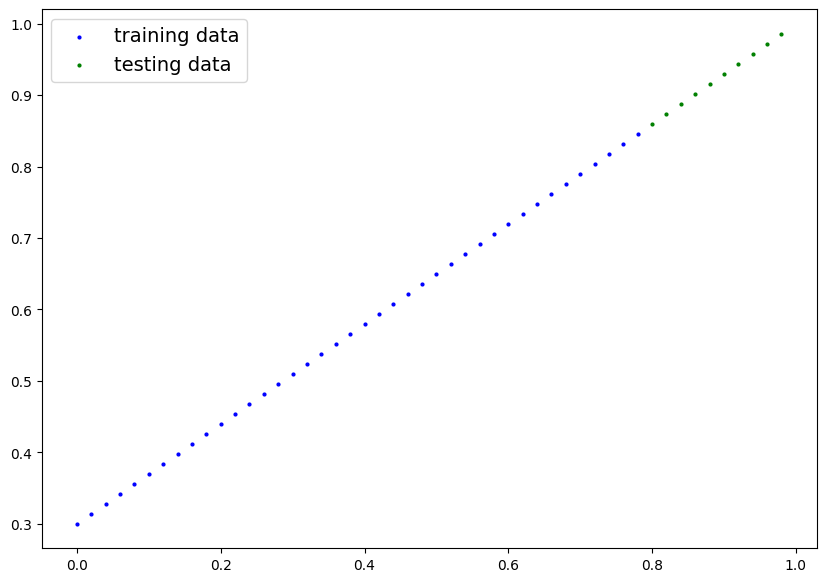

In [ ]:
plot_preds()

### building a model

what our model does:
* start with random values(weights and bias)
* look at training data and adjust random values to better suit the ideal values

how does it do it?
* gradient descent
* backpropagation

In [ ]:
# building a linear regression class
class LinearRegressionModel(nn.Module):     #-> nn.Modules base class for pytorch
    def __init__(self):             # Call the constructor of the superclass (nn.Module)
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # forward method to define computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:     # x isthe input data
        return self.weights * x + self.bias                 # linear regression formula


### pytoch building essentials


| Module              | Description                                                                                     |
|---------------------|-------------------------------------------------------------------------------------------------|
| **torch.nn**        | Provides building blocks for creating computational graphs and defining neural network layers. |
| **torch.nn.Parameter** | Represents a parameter to be learned by the model during training.                              |
| **torch.nn.Module** | Serves as the base class for all neural network modules, requiring the `forward()` method to be overwritten. |
| **torch.optim**     | Contains various optimization algorithms such as Adam, SGD, etc., for updating model parameters during training. |
| **torch.utils.data.Dataset** | Abstract class for representing datasets in PyTorch, providing access to samples and their corresponding labels. |
| **torch.utils.data.DataLoader** | Provides an iterator interface to batched data, allowing efficient loading and preprocessing of datasets for training and inference. |

### Checking the contents of our model

we can check the contents of our model y using `.parameters`

In [ ]:
# create a random seed
torch.manual_seed(42)

# create an instance of the model
model_0 = LinearRegressionModel()

model_0.parameters()

<generator object Module.parameters at 0x798792bef0d0>

In [ ]:
for param in model_0.parameters():
    print(param)

# or use
list(model_0.parameters())

Parameter containing:
tensor([0.3367], requires_grad=True)
Parameter containing:
tensor([0.1288], requires_grad=True)


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

** remember that random seed to maintainthe randomness **

In [ ]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Predictions Using `torch.inference_mode`

To evaluate our model's predictive performance, we'll assess its ability to predict `y_test` based on `x_test`. When we pass data through our model, it runs through the forward method.

In [ ]:
# make predictions with model
with torch.inference_mode():        # inference==predictions
    y_preds = model_0(X_test)       # check out https://x.com/PyTorch/status/1437838231505096708?lang=en for simpler explanation

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

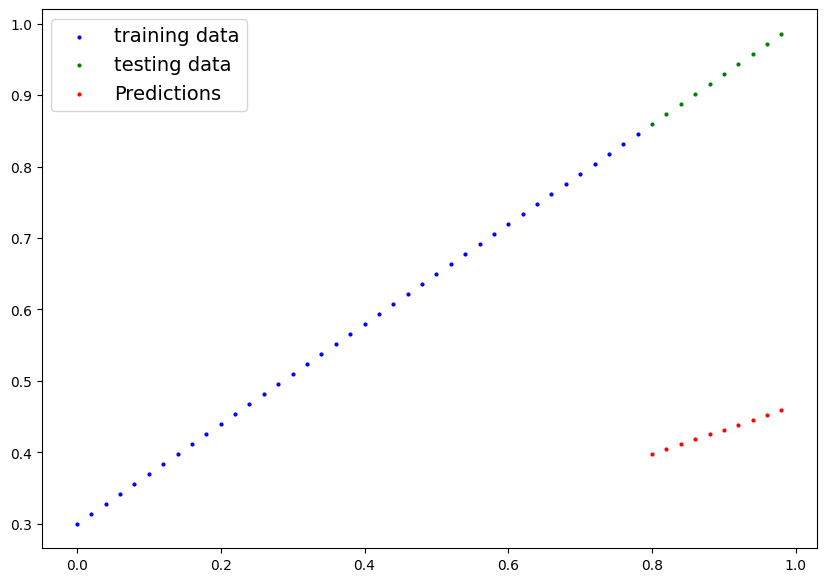

In [ ]:
plot_preds(predictions = y_preds)   # youll see that the preds(red) are far away from the blue/green dots

# Train model



The whole idea of training is for a model to move from some unknown parameters to some known parameters, i.e., from a poor representation of data to a better representation of data.

We need a way to measure how poor our models are doing.

Method 1: Loss functions/cost function/criterion function - a function used to measure how wrong your model's predictions are.

Method 2: Optimizer - takes into account the loss of a model and adjusts the model's parameters.eg weights and bias to improve the loss function

for pytorch we need a `training loop` and a `testing loop`


L1Loss function/mean absolute error


```
L_1 = (1/n) * Σ |y_pred_i - y_true_i|
```

Where:
- \( L_1 \) is the \( L_1 \) loss or Mean Absolute Error (MAE),
- \( n \) is the number of samples,
- \( y_pred_i \) is the predicted value for the \( i \)-th sample,
- \( y_true_i \) is the true (actual) value for the \( i \)-th sample,
- \( | \cdot | \) represents the absolute value.

This formula calculates the average absolute difference between predicted and true values across all samples in the dataset.

the formulae is already set in pytorch as `L1Loss`


Resource: https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html

Here's a table highlighting the most commonly used optimization algorithms:

| Algorithm  | Description                                                                                                   |
|------------|---------------------------------------------------------------------------------------------------------------|
| **Adam**   | A popular optimization algorithm that combines aspects of RMSprop and momentum methods for faster convergence. |
| **SGD**    | Stochastic\Random Gradient Descent, a fundamental optimization algorithm used in training neural networks.          |
| **RMSprop**| Root Mean Square Propagation, similar to AdaGrad but with a moving average of squared gradients.             |
| **Adagrad**| Adaptive Gradient Algorithm, adjusts the learning rate of each parameter based on the frequency of updates. |
| **AdamW**  | Adam with weight decay, a variation of Adam that incorporates weight decay regularization.                   |
| **RAdam**  | Rectified Adam, a modification of Adam that introduces a term to stabilize the adaptive learning rate.       |

These algorithms are widely used in training neural networks due to their effectiveness in optimizing model parameters.

### loss function

In [ ]:
# loss function setup using torch.nn.L1Loss()
loss_fn = torch.nn.L1Loss()

# setting up optimizers using torch.optim and stochastic gradient descent
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)                   # learning rate ie the steps between parameter change ie changes the weights tensor

### buildinga training loop in

### PyTorch Training Loop Steps

1. **Forward Pass:** The model goes through all of the training data once, performing its `forward()` function calculations (`model(x_train)`).

2. **Calculate the Loss:** The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (`loss = loss_fn(y_pred, y_train)`).

3. **Zero Gradients:** The optimizer's gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (`optimizer.zero_grad()`).

4. **Perform Backpropagation on the Loss:** Computes the gradient of the loss with respect to every model parameter to be updated (each parameter with `requires_grad=True`). This is known as backpropagation, hence "backwards" (`loss.backward()`).

5. **Step the Optimizer (Gradient Descent):** Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them (`optimizer.step()`).




![picture](https://github.com/BMugo84/pytorch_in_25_hours/blob/main/training_loop_visualized.png?raw=True)

![picture](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/images/01-pytorch-training-loop-annotated.png?raw=True)

In [ ]:
# adding a random seed
torch.manual_seed(42)

# epoch is one loop through the data
epochs = 200

# loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train()

    # 1. forward pass
    y_pred = model_0(X_train) # remember our formulae, y = a+bX where X=X_train

    # 2. claculate the loss
    loss = loss_fn(y_pred, y_train)  # L1Loss accepts input and target, which have to be of the same shape or use (preds,labels)
    # print(f"Loss: {loss}" )

    # 3. optimizer zero_grad
    optimizer.zero_grad()

    # 4. perform backpropagation on the loss wrt parameters
    loss.backward()

    # step the optimizer(gradient descent approaching 0)
    optimizer.step()

    # Print loss, weights, and biases in one line
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}, Weights: {model_0.weights.item()}, Bias: {model_0.bias.item()}")


    model_0.eval()  # turns off different settings in the model not needed for evaluation

    # print(model_0.state_dict())

Epoch 1/200, Loss: 0.024458957836031914, Weights: 0.5800304412841797, Bias: 0.3503098785877228
Epoch 2/200, Loss: 0.024110013619065285, Weights: 0.5818304419517517, Bias: 0.3498098850250244
Epoch 3/200, Loss: 0.02376994863152504, Weights: 0.58342045545578, Bias: 0.3488098978996277
Epoch 4/200, Loss: 0.02342480979859829, Weights: 0.585220456123352, Bias: 0.3483099043369293
Epoch 5/200, Loss: 0.023080935701727867, Weights: 0.5868104696273804, Bias: 0.3473099172115326
Epoch 6/200, Loss: 0.022739607840776443, Weights: 0.5886104702949524, Bias: 0.34680992364883423
Epoch 7/200, Loss: 0.022391926497220993, Weights: 0.5902004837989807, Bias: 0.3458099365234375
Epoch 8/200, Loss: 0.022054409608244896, Weights: 0.5920004844665527, Bias: 0.34530994296073914
Epoch 9/200, Loss: 0.02170540764927864, Weights: 0.5938004851341248, Bias: 0.34480994939804077
Epoch 10/200, Loss: 0.021366719156503677, Weights: 0.5953904986381531, Bias: 0.34380996227264404
Epoch 11/200, Loss: 0.021020207554101944, Weights: 


"The `.train()` method activates **dropout layers**, which randomly drop neurons during training to prevent overfitting and promote better generalization. Additionally, it switches **batch normalization layers** from using population statistics to using mini-batch statistics*(sample stats)*."

The main function of `gradient descent` is indeed to minimize the loss function as much as possible with each step taken during optimization.

In [ ]:
model_0.state_dict(), (weight,bias)

(OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))]),
 (0.7, 0.3))

In [ ]:
model_0.state_dict(), (weight,bias)

(OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))]),
 (0.7, 0.3))

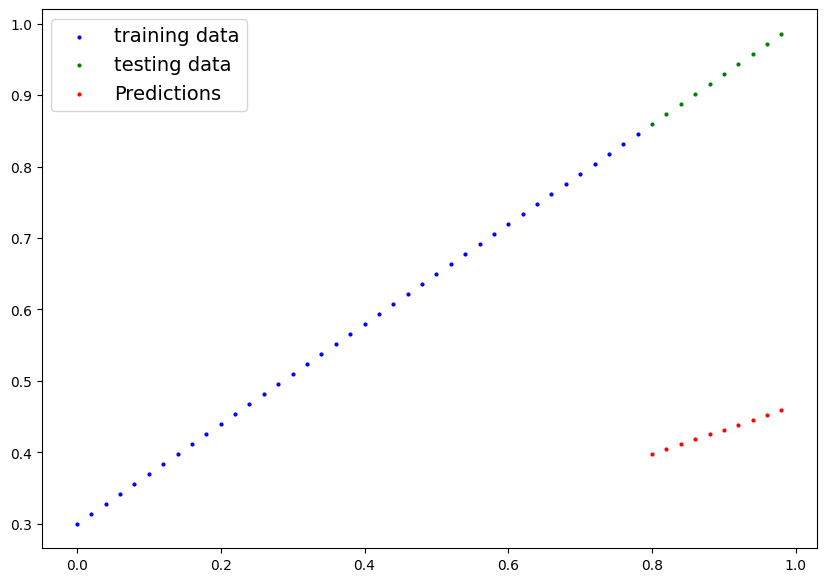

In [ ]:
plot_preds(predictions=y_preds)

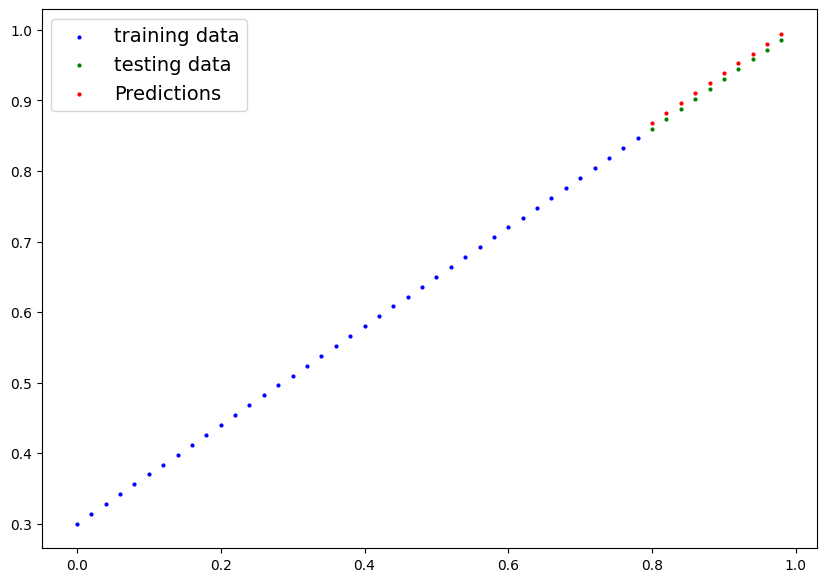

In [ ]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_preds(predictions=y_preds_new)

### adding testing

![picture](https://github.com/BMugo84/pytorch_in_25_hours/blob/main/testing_loop.png?raw=True)

In [ ]:
# adding a random seed
torch.manual_seed(42)

# epoch is one loop through the data
epochs = 100

# loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train()

    # 1. forward pass
    y_pred = model_0(X_train) # remember our formulae, y = a+bX where X=X_train

    # 2. claculate the loss
    loss = loss_fn(y_pred, y_train)  # L1Loss accepts input and target, which have to be of the same shape or use (preds,labels)
    print(f"Loss: {loss}" )

    # 3. optimizer zero_grad
    optimizer.zero_grad()

    # 4. perform backpropagation on the loss wrt parameters
    loss.backward()

    # step the optimizer(gradient descent approaching 0)
    optimizer.step()


    model_0.eval()  # turns off different settings in the model not needed for evaluation

    # view whats happening
    with torch.inference_mode():
        # 1. forward pass
        test_pred = model_0(X_test)

        # 2. calculate loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}  |   Loss: {loss}    |   Test Loss {test_loss}")
        print(model_0.state_dict())




Loss: 0.31288138031959534
Epoch: 0  |   Loss: 0.31288138031959534    |   Test Loss 0.4945361614227295
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Epoch: 10  |   Loss: 0.31288138031959534    |   Test Loss 0.4945361614227295
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Loss: 0.31288138031959534
Epoch: 20  |   Loss: 0.31288138031959534    |   Test Loss 0.4945361614227295
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
Loss:

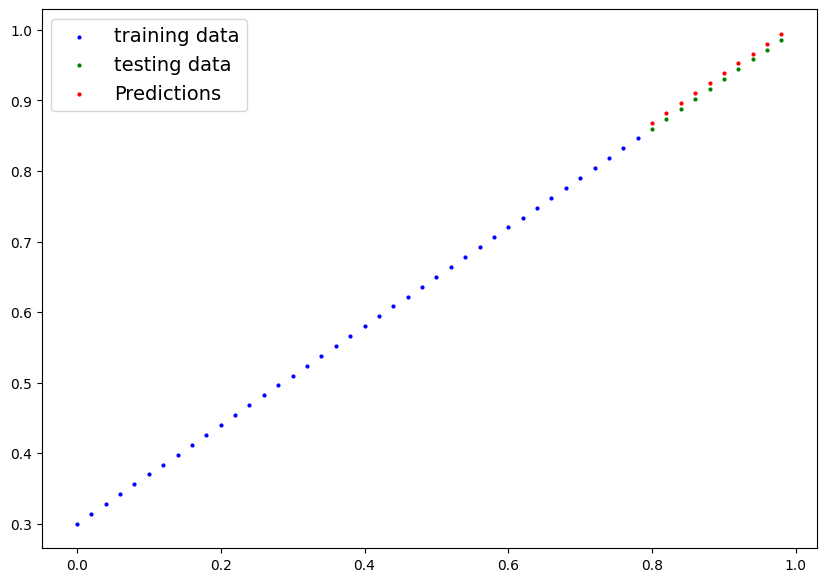

In [ ]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_preds(predictions=y_preds_new)

In [ ]:
weight,bias

(0.7, 0.3)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

### tracking loss values and test loss values

In [ ]:
# adding a random seed
torch.manual_seed(42)

# epoch is one loop through the data
epochs = 200

# keeping track
epoch_count = []
loss_values = []
test_loss_values = []

# loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train()

    # 1. forward pass
    y_pred = model_0(X_train) # remember our formulae, y = a+bX where X=X_train

    # 2. claculate the loss
    loss = loss_fn(y_pred, y_train)  # L1Loss accepts input and target, which have to be of the same shape or use (preds,labels)
    # print(f"Loss: {loss}" )

    # 3. optimizer zero_grad
    optimizer.zero_grad()

    # 4. perform backpropagation on the loss wrt parameters
    loss.backward()

    # step the optimizer(gradient descent approaching 0)
    optimizer.step()


    model_0.eval()  # turns off different settings in the model not needed for evaluation

    # view whats happening
    with torch.inference_mode():
        # 1. forward pass
        test_pred = model_0(X_test)

        # 2. calculate loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch}  |   Loss: {loss}    |   Test Loss {test_loss}")
        print(model_0.state_dict())

Epoch: 0  |   Loss: 0.31288138031959534    |   Test Loss 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10  |   Loss: 0.1976713240146637    |   Test Loss 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20  |   Loss: 0.08908725529909134    |   Test Loss 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30  |   Loss: 0.053148526698350906    |   Test Loss 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40  |   Loss: 0.04543796554207802    |   Test Loss 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50  |   Loss: 0.04167863354086876    |   Test Loss 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60  |   Loss: 0.03818932920694351    |   Test Loss 0.08886633068323135
OrderedDict([('wei

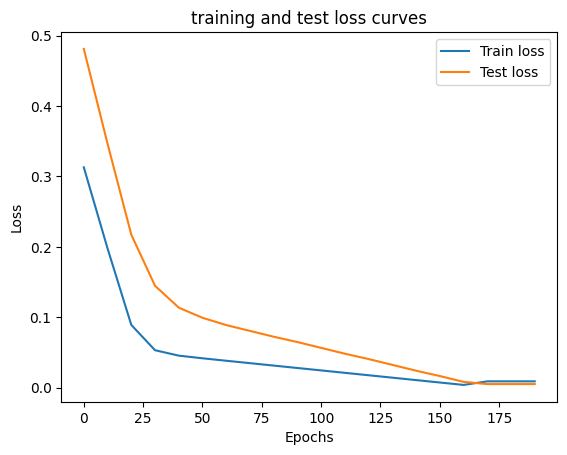

In [ ]:
import numpy as np
# convert loss values to numpy
loss_values_np = np.array(torch.tensor(loss_values).numpy())

# plot the loss curves

plt.plot(epoch_count, loss_values_np, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

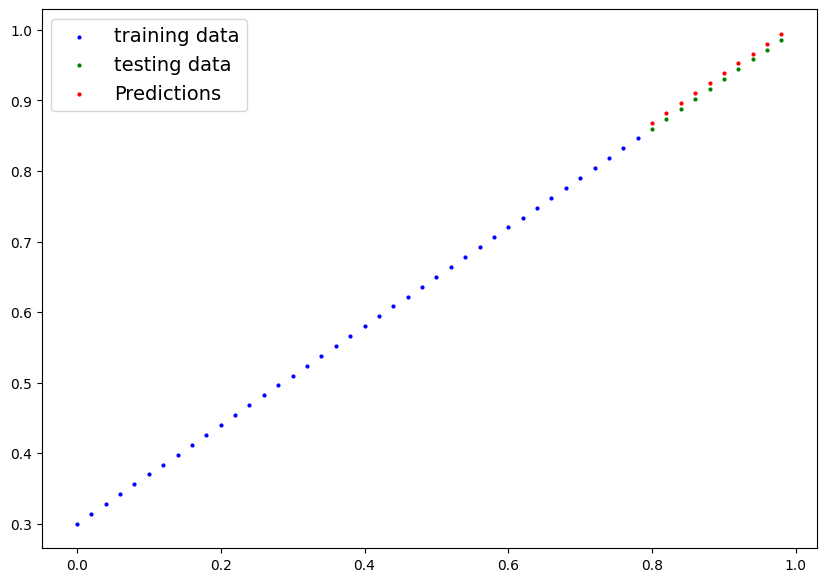

In [ ]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_preds(predictions=y_preds_new)

# saving the model


There are three main methods you should know about for saving and loading models in PyTorch:

1. **`torch.save()`:** This method allows you to save a PyTorch object in Python pickle format.

2. **`torch.load()`:** This method allows you to load a saved PyTorch model.

3. **`torch.nn.Module.load_state_dict()`:** This method allows you to load a model's saved state dictionary.

[Learn more](https://pytorch.org/tutorials/beginner/saving_loading_models.html#:~:text=To%20save%20multiple%20components%2C%20organize,locally%20using%20torch.load()%20.)

---



In [ ]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model_0.state_dict():
    print(param_tensor, "\t", model_0.state_dict()[param_tensor].size())

Model's state_dict:
weights 	 torch.Size([1])
bias 	 torch.Size([1])


#### torch.save

`torch.save(obj, f, pickle_module=pickle, pickle_protocol=DEFAULT_PROTOCOL, _use_new_zipfile_serialization=True)`
Saves an object to a disk file.

Parameters
* `obj (object)` – saved object

* `f (Union[str, PathLike, BinaryIO, IO[bytes]])` – a file-like object (has to implement write and flush) or a string or os.PathLike object containing a file name

* `pickle_module (Any)` – module used for pickling metadata and objects

* `pickle_protocol (int)` – can be specified to override the default protocol

In [ ]:
# saving our model
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. cretae model save path
MODEL_NAME = "pytorch01workflow_model.pth"  # saving as .pt or .pth pytorch file extension
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state dict
print(f"saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


saving model to models/pytorch01workflow_model.pth


In [ ]:
## loading a Pytorch model

model = torch.load(f="/content/models/pytorch01workflow_model.pth")

In [ ]:
# to load in a saved state-dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# load the saved state_dict of model
loaded_model_0.load_state_dict(torch.load(f="/content/models/pytorch01workflow_model.pth"))

<All keys matched successfully>

In [ ]:
# making some predictions with our model

loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all together in one place

### import necessarry dependancies

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [3]:
# create device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 6.1 Data

In [4]:
# create some data using y = a + bX
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# create X and y( feautures and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = bias + X * weight

# visualize
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
# split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [6]:
# visualize data
def plot_preds(train_data, train_labels,test_data, test_labels, predictions=None):
    """
    args:
        train_data: training data
        train_labels: training labels
        test_data: test data
        test_labels: test labels
        predictions: predictions
    """
    plt.figure(figsize=(10, 7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    # plot test data
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # if predictions exist, plot them
    if predictions is not None:
        # plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # create a legend
    plt.legend(prop={"size": 14});

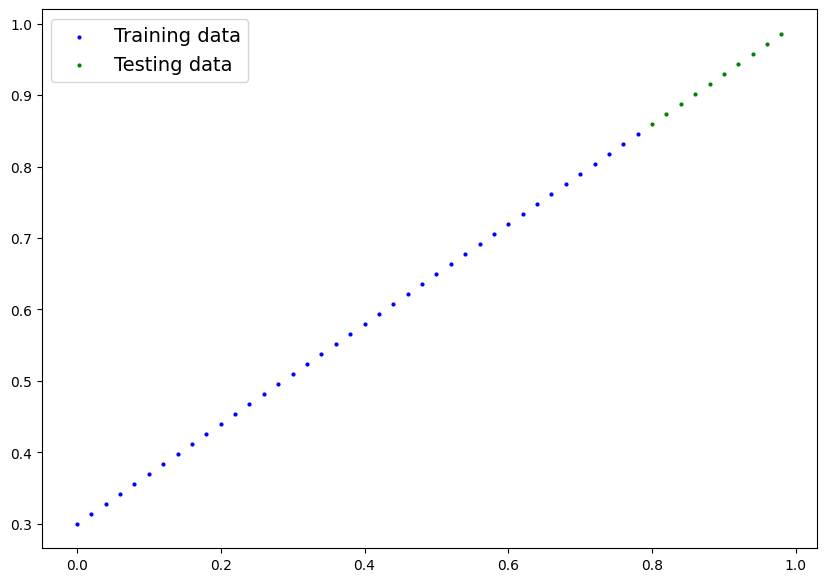

In [7]:
plot_preds(X_train, y_train, X_test, y_test)

### 6.2 building a pytorch linear model

In [8]:
# create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # using nn.linear() for creating model parameters https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
        self.linear_layer = nn.Linear(in_features=1,    #dims of X
                                      out_features=1)   #dims of y

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# set manual seed ie random seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [9]:
# set the model to use target device. this enables the model to be ingrained into the devices' memory
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 training

we need a
* loss function
* optimizer
* training loop
* testing loop

In [10]:
# loss function
loss_fn = nn.L1Loss()

# optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [11]:
# set random seed
torch.manual_seed(42)

# set epochs ie no of loops
epochs = 200

for epoch in range(epochs):
    # set to training mode
    model_1.train()

    # forward pass
    y_pred = model_1(X_train)

    # calculate the loss
    loss = loss_fn(y_pred, y_train)

    # optimizer zero grad
    optimizer.zero_grad()

    # backpropagation
    loss.backward()

    # optimizer step
    optimizer.step()

    ### testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    # visualize
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.01380180753767

In [12]:
# visualize if we approached our required parameters
model_1.state_dict(), weight, bias

(OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
              ('linear_layer.bias', tensor([0.3025]))]),
 0.7,
 0.3)

In [13]:
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

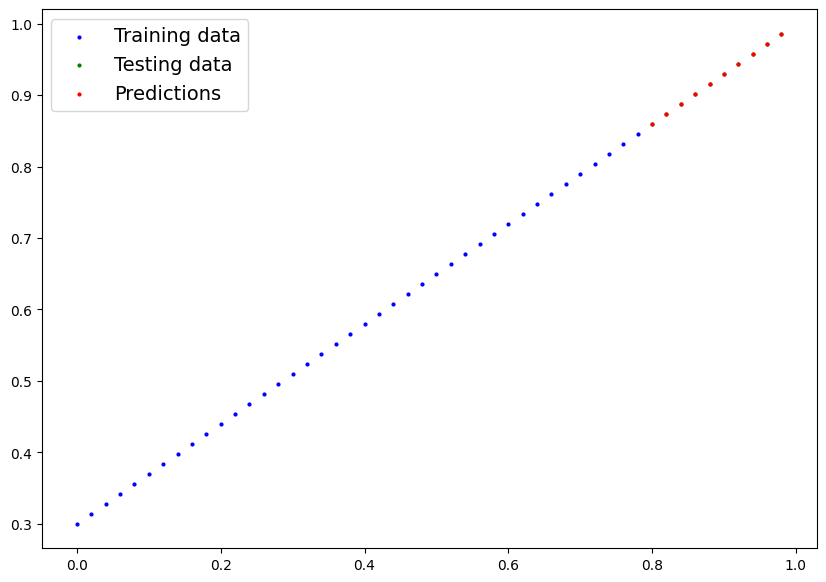

In [14]:
plot_preds(train_data=X_train,
           train_labels=y_train,
           test_data=X_test,
           test_labels=y_test,
           predictions= y_preds)

In [16]:
### 6.5 saving the model

# saving our model
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. cretae model save path
MODEL_NAME = "pytorch01workflowmodel_V2.pth"  # saving as .pt or .pth pytorch file extension
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. save the model state dict
print(f"saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to models/pytorch01workflowmodel_V2.pth


In [17]:
# loading the model
loaded_model_1 = LinearRegressionModelV2()

# loading the models state_dict
loaded_model_1.load_state_dict(torch.load(f="/content/models/pytorch01workflowmodel_V2.pth"))

#put the model to the device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [18]:
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
loaded_model_1_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

In [20]:
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])